# Mushroom Project

## Problem Statement:

### Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [29]:
data.shape

(8124, 23)

###### it has 8124 rows & 23 columns

In [30]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

###### No null values

In [31]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

###### Here class column is our label & all other columns are fetaures

In [32]:
data["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

###### The class column has p & e values. And data is balanced.

In [33]:
data['class']=data['class'].replace({'e':0,'p':1})
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:
data["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data["cap-shape"]=le.fit_transform(data["cap-shape"])

In [36]:
data["cap-shape"].value_counts()

5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64

Here 'x' shape is 5
     's' shape is 4
     'k' shape is 3
     'f' shape is 2
     'c' shape is 1
     'b' shape is 0.

In [37]:
data['cap-surface'].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['cap-surface']=le.fit_transform(data["cap-surface"])

In [41]:
data['cap-surface'].value_counts()

3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64

Here 'y' surface is 3
     's' surface is 2
     'g' surface is 1
     'f' surface is 0.

In [42]:
data['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [43]:
data['cap-color']=le.fit_transform(data["cap-color"])
data['cap-color'].value_counts()

4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64

In [47]:
X=data[['bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
for col in X:
    data[col]=le.fit_transform(X[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap-suface
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,2
1,0,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,2
2,0,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,2
3,1,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,3
4,0,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,2


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8

All columns has been changed from object to integer

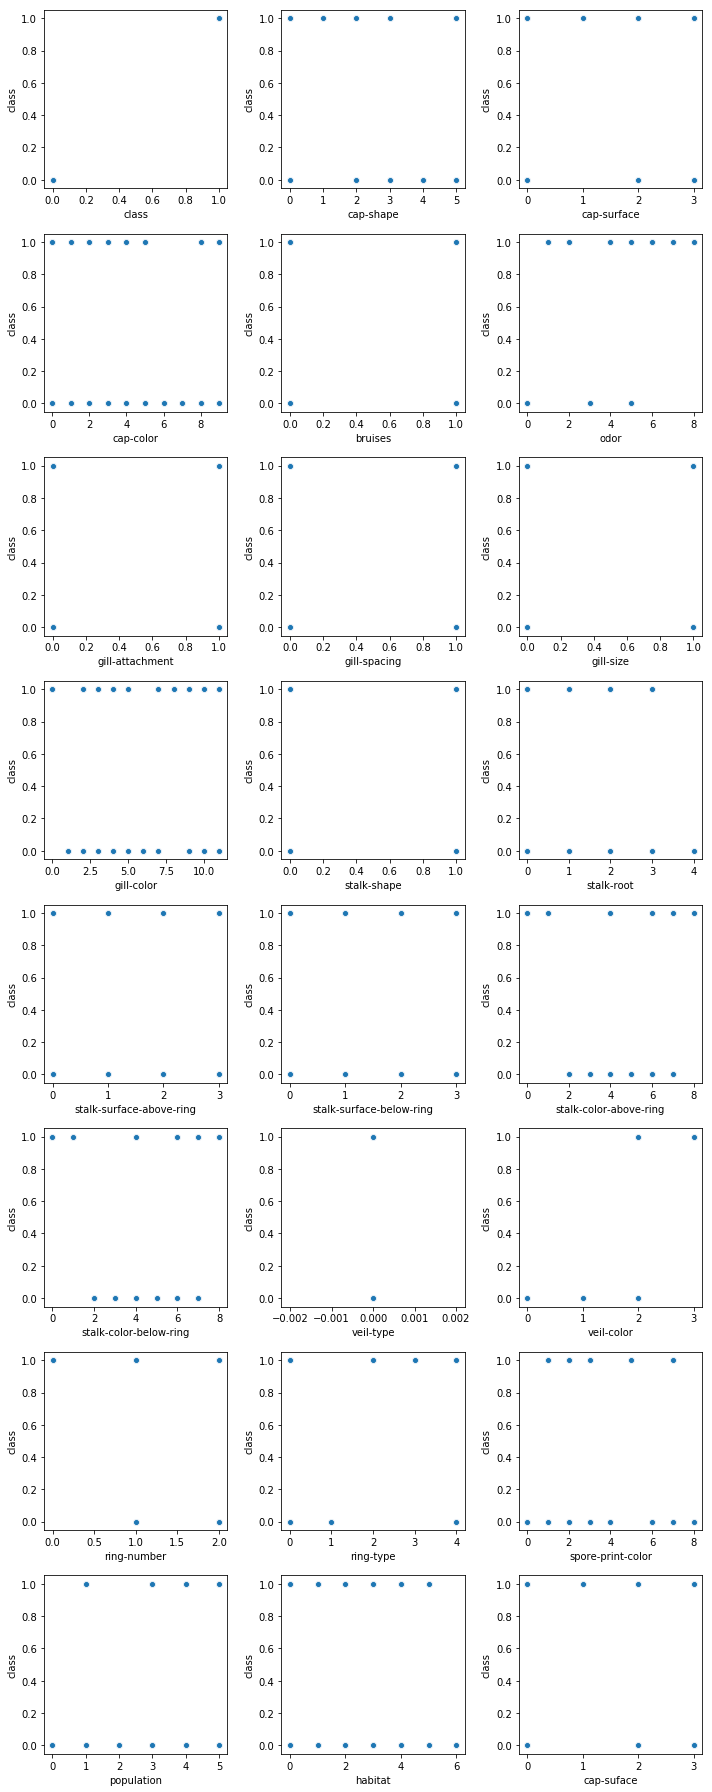

In [50]:
plt.figure(figsize=(10,25),facecolor='w')
graph=1
for col in data:
    if graph<25:
        ax=plt.subplot(8,3,graph)
        sns.scatterplot(x=col,y="class",data=data)
        plt.xlabel(col)
        plt.ylabel("class")
    graph+=1
plt.tight_layout()

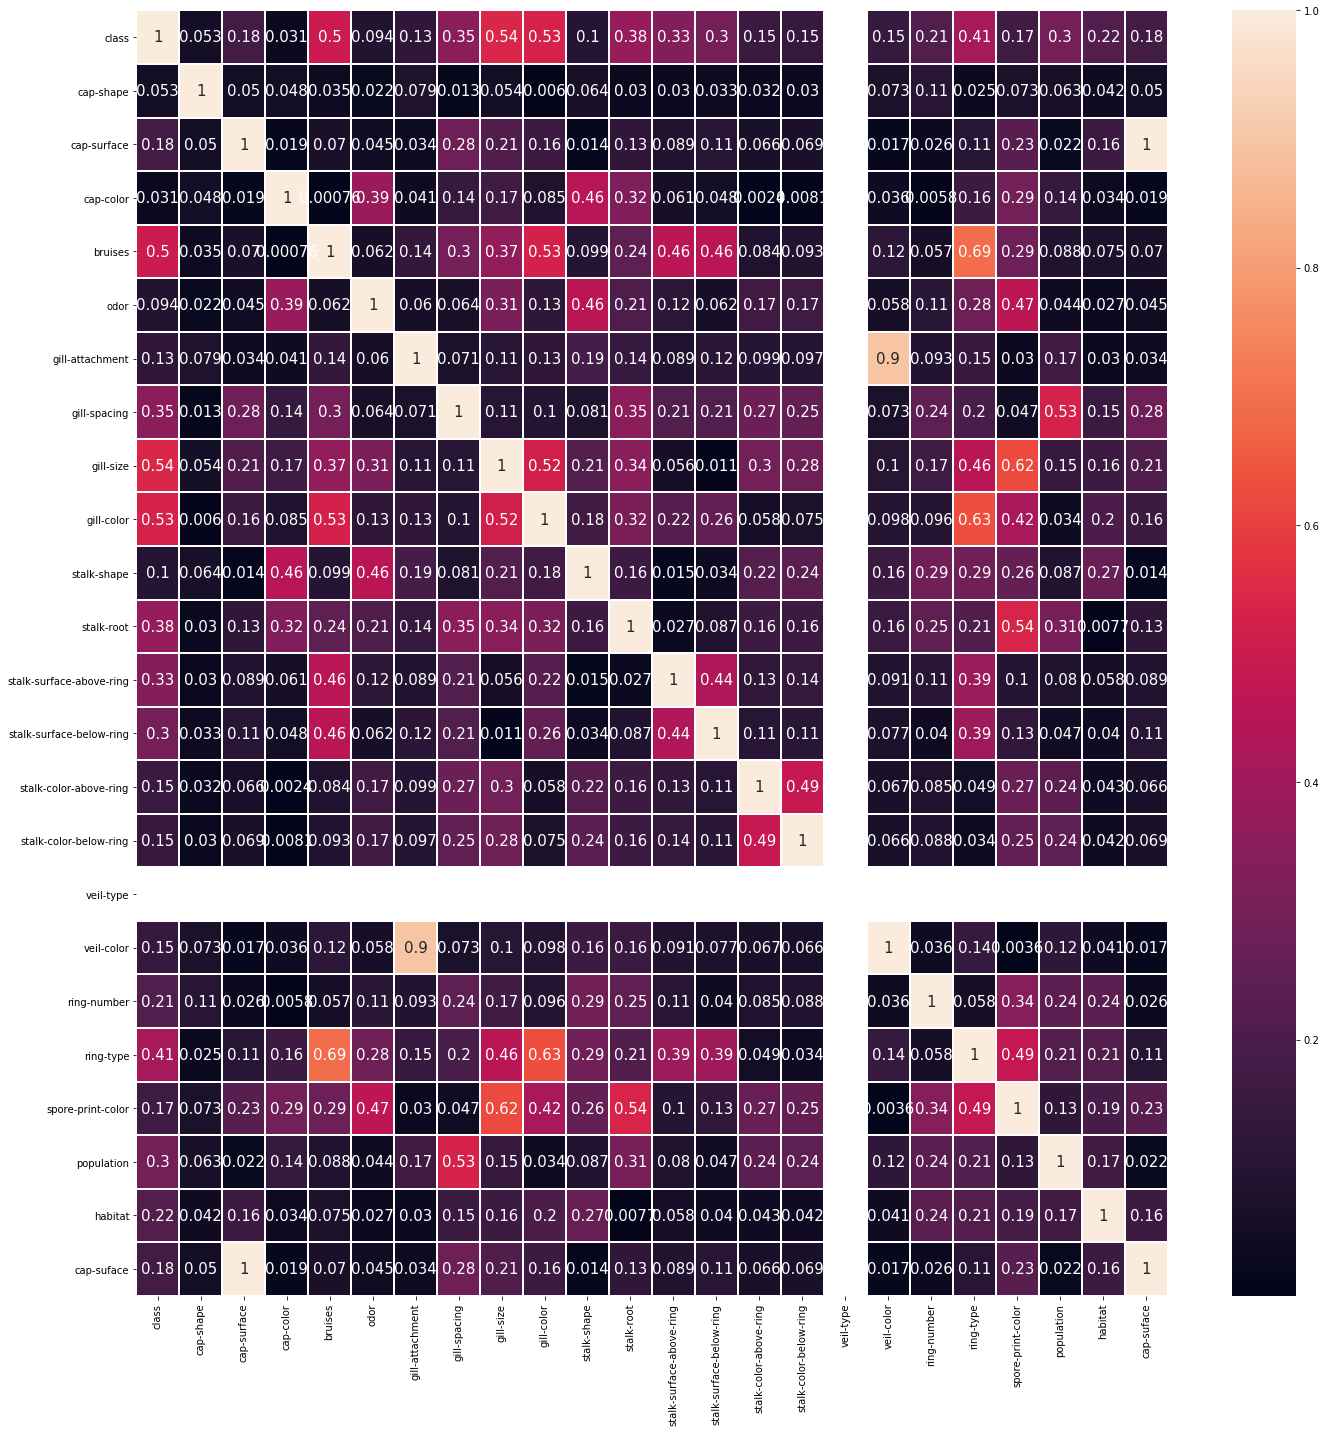

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

from heatmap we analyse that there is multicolinearity between columns like 'ring-type' & 'bruishes','ring-typ'e & 'gill-color', and there is two columns that are same in dataset i.e. 'cap-surface' & 'cap-suface'

In [54]:
data["veil-type"].value_counts()

0    8124
Name: veil-type, dtype: int64

In [69]:
data["veil-color"].value_counts()

2    7924
1      96
0      96
3       8
Name: veil-color, dtype: int64

From above two graph we analyse that veil-type column has only 0 values init. so, we an drop that column

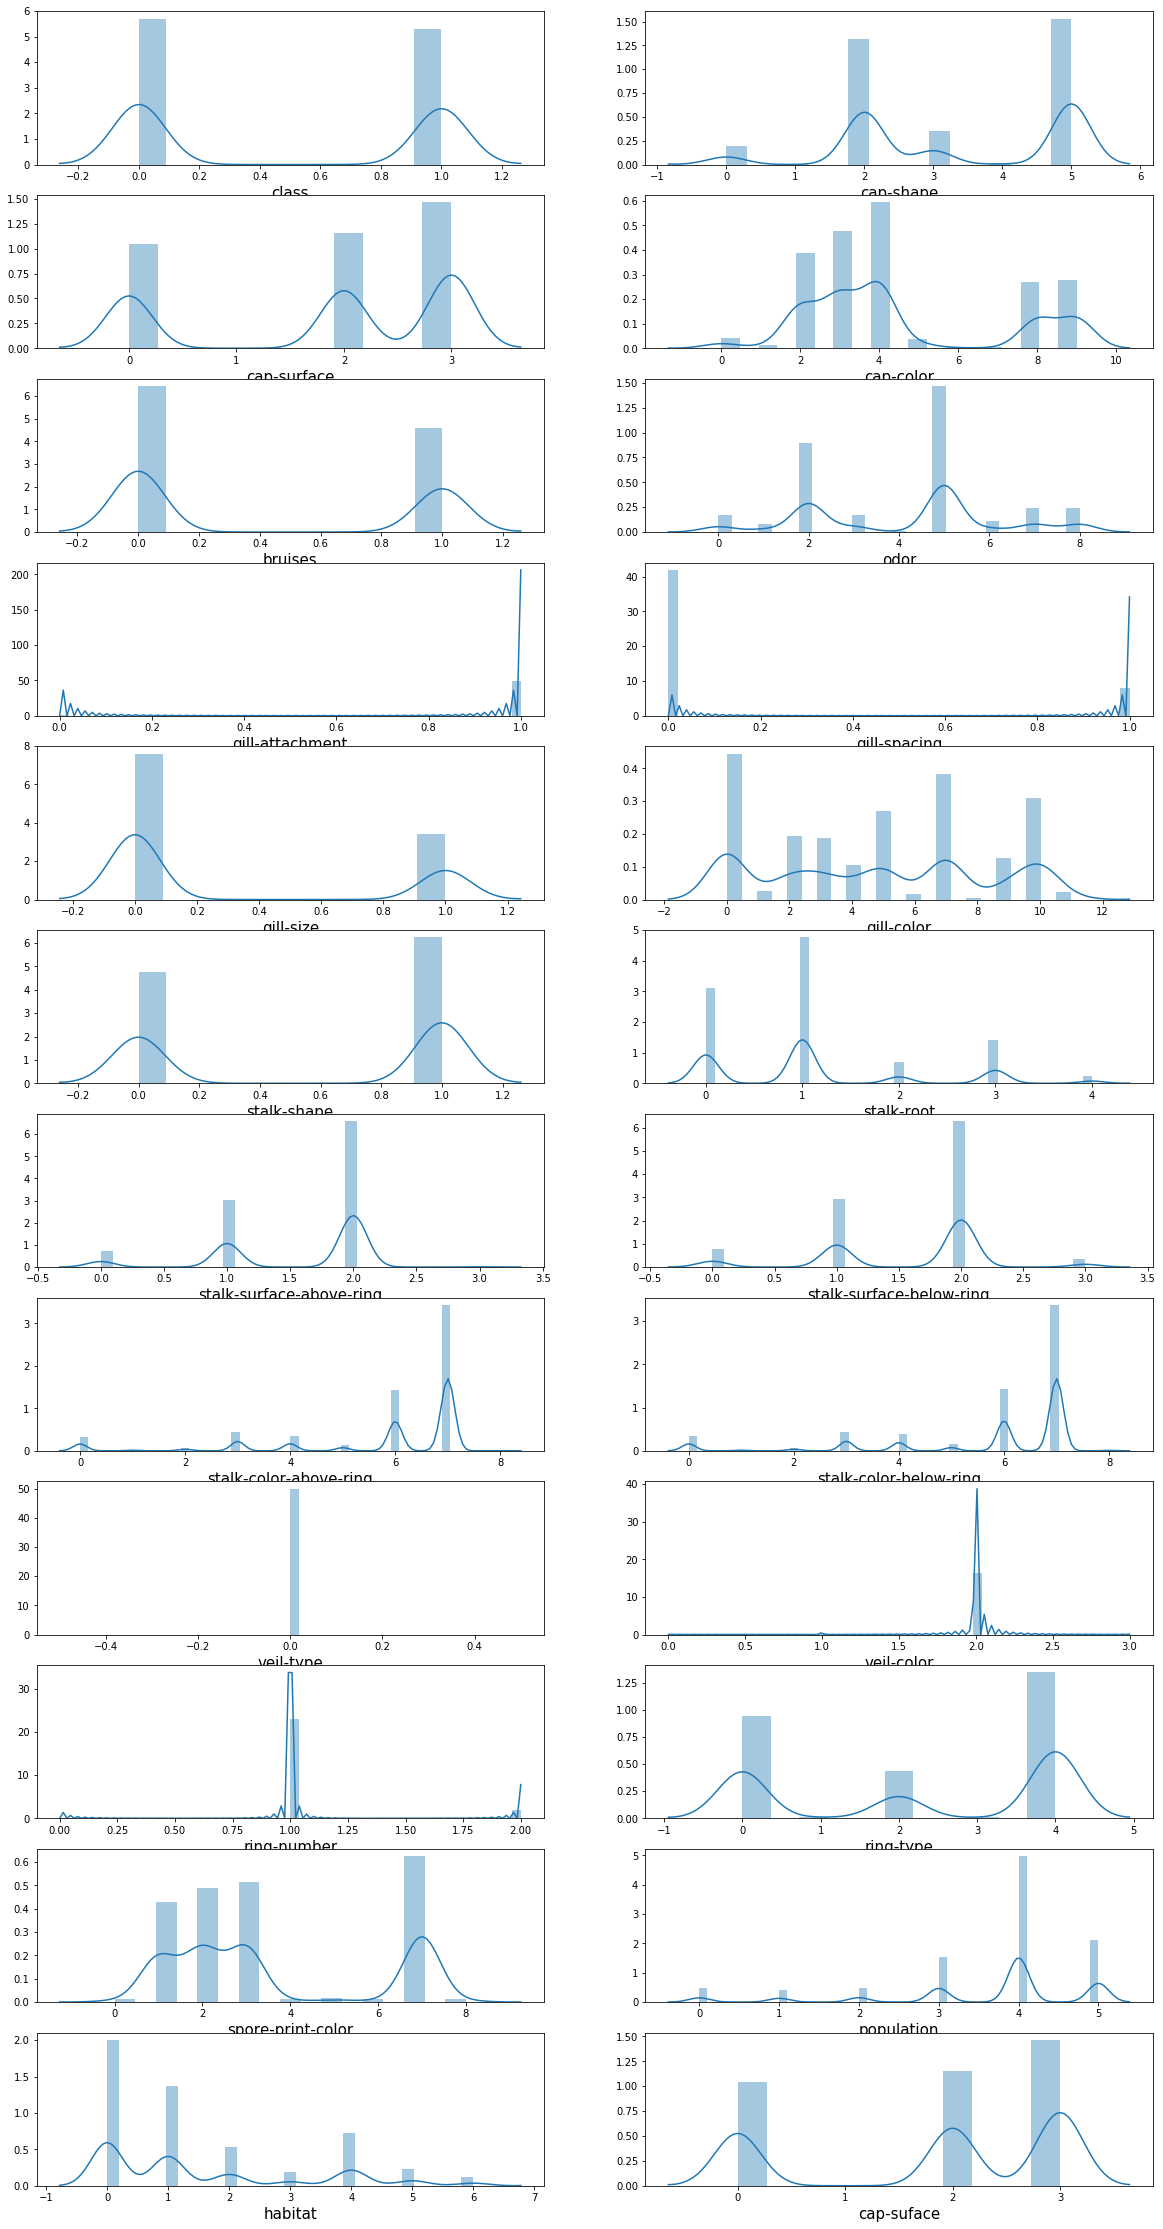

In [63]:
plt.figure(figsize=(20,40),facecolor='w')
plotno=1
for col in data:
    if plotno<=24:
        ax=plt.subplot(12,2,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=15)
    plotno+=1
plt.show()

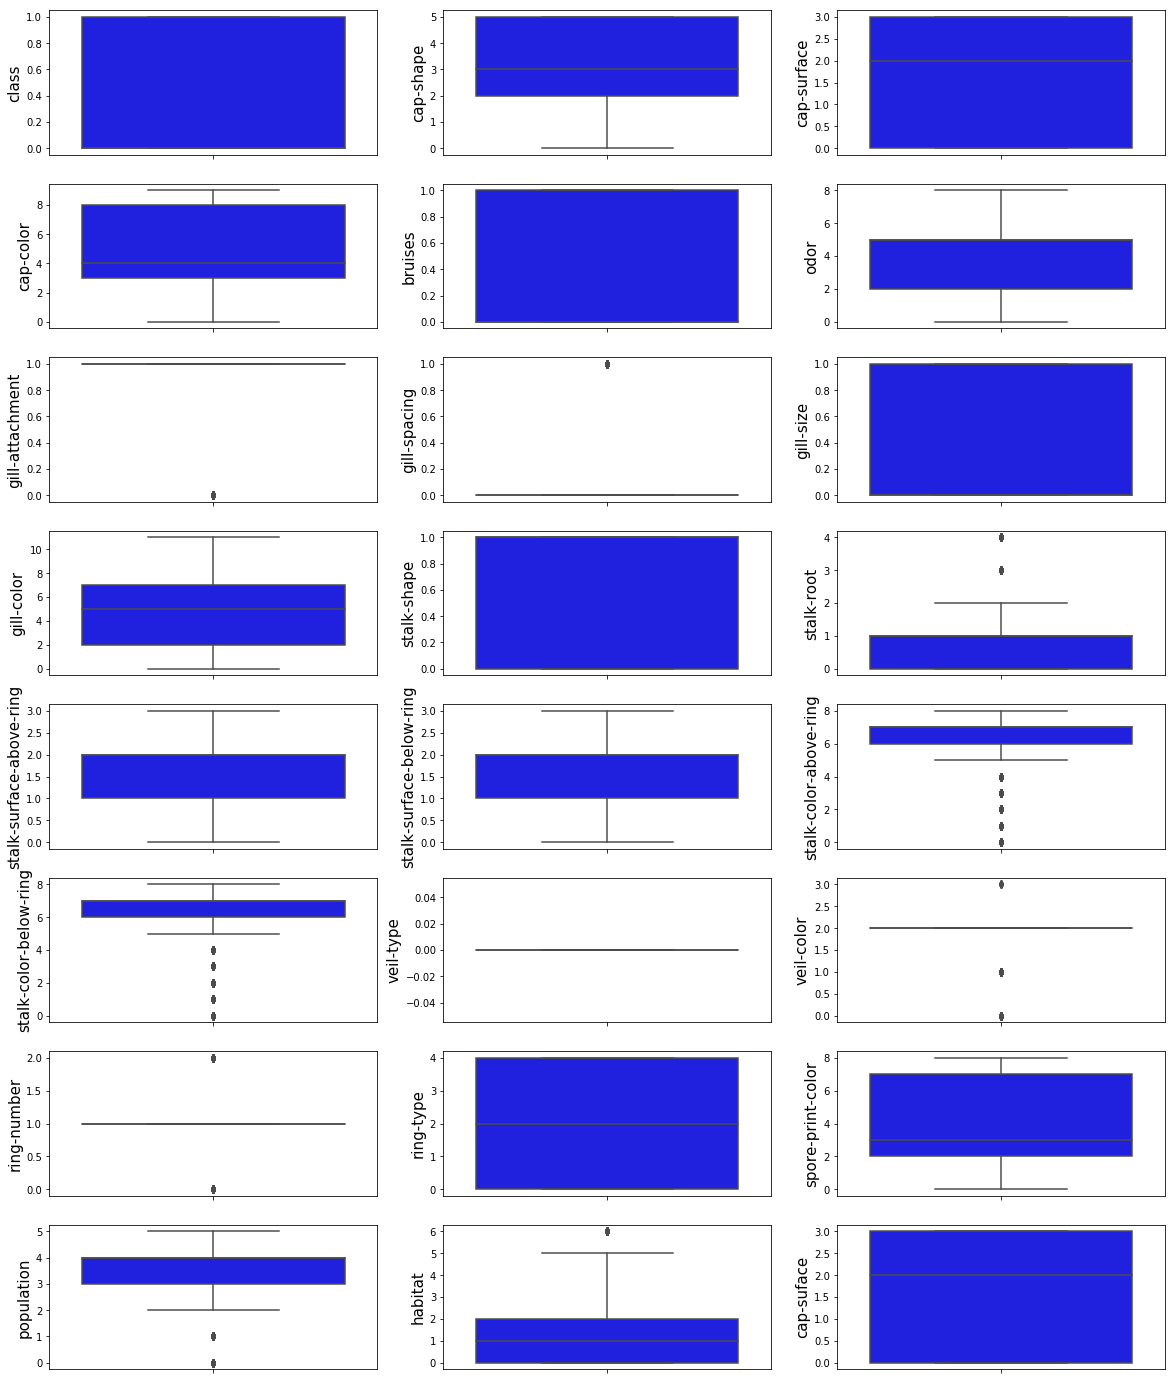

In [68]:
plotn=1
plt.figure(figsize=(20,25))
for col in data:
    if plotn<25:
        ax=plt.subplot(8,3,plotn)
        sns.boxplot(data[col],color='blue',orient='v')
        plt.ylabel(col,fontsize=15)
    plotn+=1
plt.show()

'gill-attachment','gill-spacing','stalk-root','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number',
'poplation','habitat' these columns has outliers& are not distributed normally.

## Data Cleaning

In [72]:
data.drop(columns=['ring-type','cap-suface','veil-type','veil-color'],inplace=True,axis=1)

In [77]:
data.drop(columns="spore-print-color",axis=1,inplace=True)

In [98]:
data.drop(columns="gill-attachment",axis=1,inplace=True)

In [99]:
data.shape

(5688, 18)

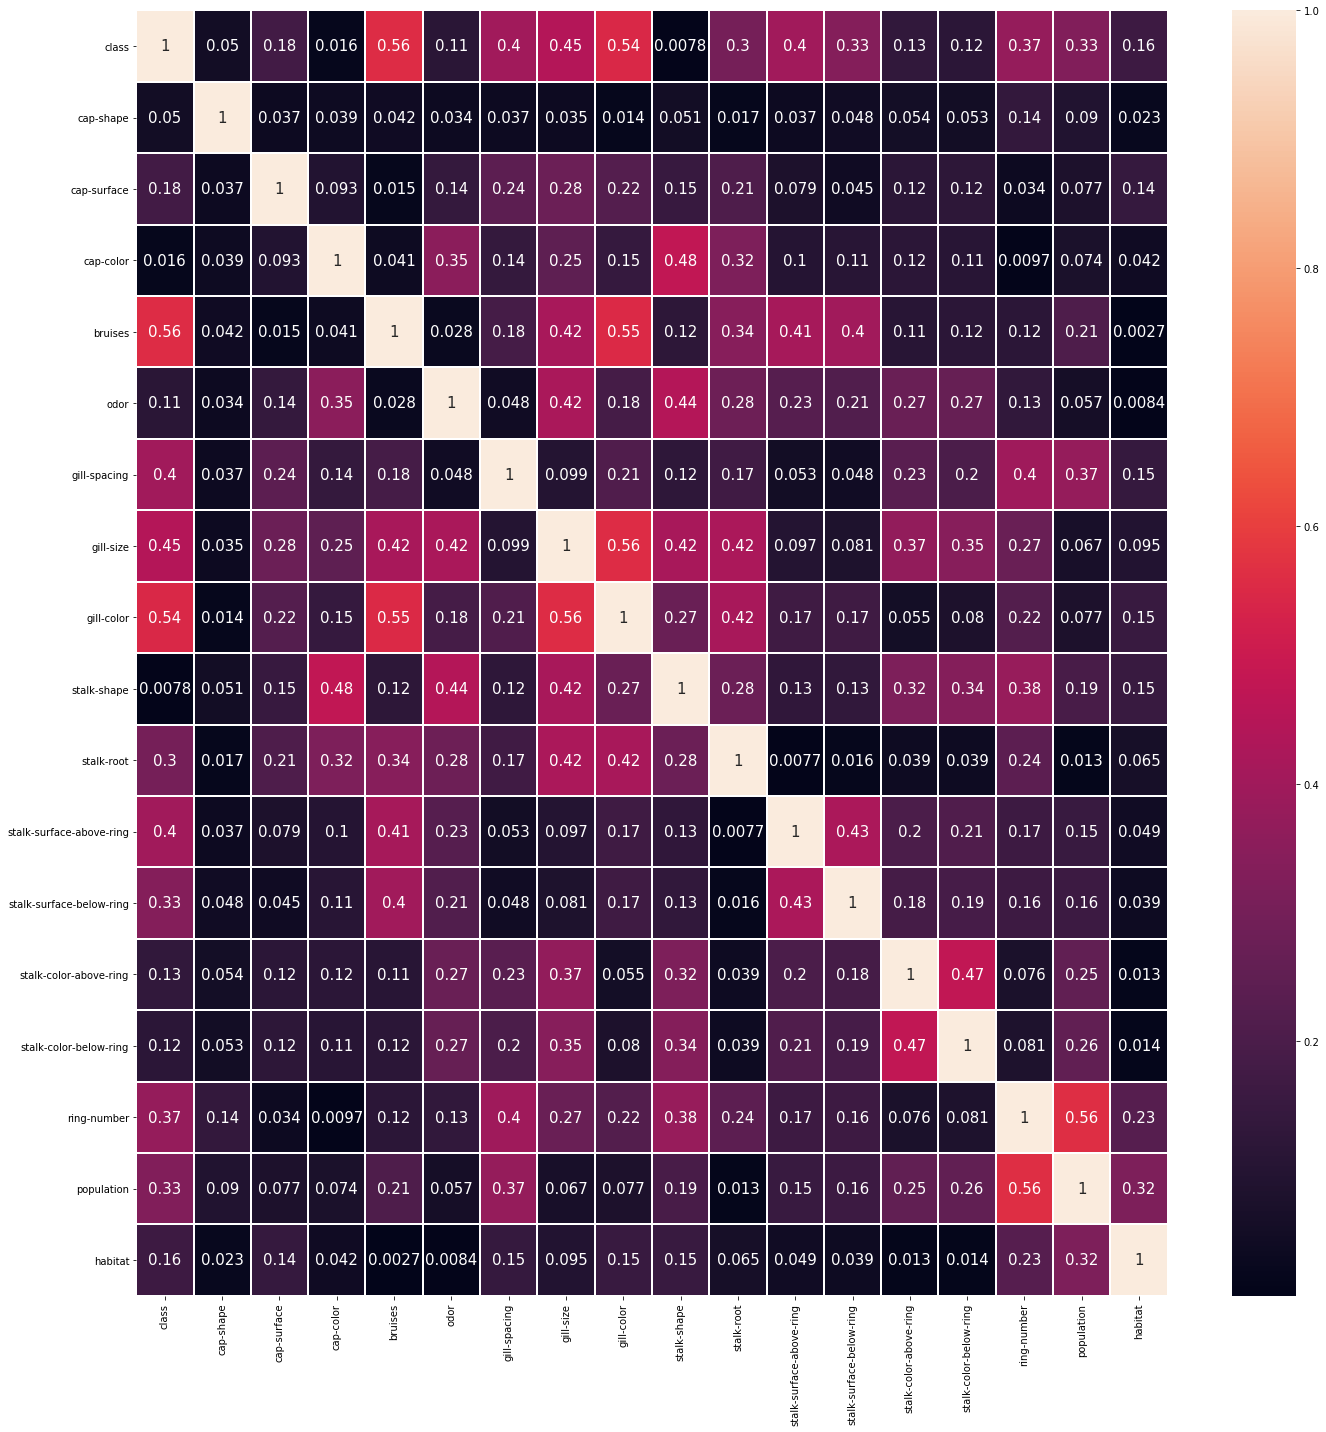

In [100]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

In [101]:
# drop duplicates
data.drop_duplicates(inplace=True)

In [102]:
data.shape

(5688, 18)

## Removing Outliers

In [88]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,1,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,1,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,1,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,1,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,1,0,1


In [91]:
from scipy.stats import zscore
zs=zscore(data[['gill-attachment','gill-spacing','stalk-root','stalk-color-above-ring','stalk-color-below-ring','ring-number','population','habitat']])
filtered=(np.abs(zs)<3).all(axis=1)
data=data[filtered]

In [92]:
data.shape

(5688, 19)

In [94]:
X=data.drop("class",axis=1)
Y=data['class']

In [96]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,population,habitat
count,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.0,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000
mean,0.642757,3.336146,1.899437,4.393812,0.331927,4.135021,1.0,0.112518,0.385373,4.071730,0.548523,0.773558,1.500703,1.495077,5.668073,5.637131,1.105485,3.872011,1.701828
std,0.479229,1.560755,1.205059,2.609240,0.470946,2.248197,0.0,0.316030,0.486726,3.663792,0.497684,0.810120,0.592729,0.615985,2.041822,2.046885,0.307205,0.913608,1.824279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,1.000000,4.000000,0.000000
50%,1.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.0,0.000000,0.000000,3.000000,1.000000,1.000000,2.000000,2.000000,6.000000,6.000000,1.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.0,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,1.000000,4.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.0,1.000000,1.000000,11.000000,1.000000,3.000000,3.000000,3.000000,8.000000,8.000000,2.000000,5.000000,6.000000


## selection of features

In [109]:
from sklearn.feature_selection import SelectKBest,f_classif
best_feature=SelectKBest(score_func=f_classif,k=17)
fit=best_feature.fit(X,Y)
df_score=pd.DataFrame(fit.scores_,columns=['Feature_score'])
df_columns=pd.DataFrame(X.columns,columns=['Feature_Name'])
feature_score=pd.concat([df_columns,df_score],axis=1)


C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [110]:
feature_score.dtypes

Feature_Name      object
Feature_score    float32
dtype: object

In [111]:
top=feature_score.nlargest(17,'Feature_score')

In [112]:
colName=top.Feature_Name.tolist()

In [113]:
newX=data[colName]
newX.head()

,bruises,gill-color,gill-size,gill-spacing,stalk-surface-above-ring,ring-number,stalk-surface-below-ring,population,stalk-root,cap-surface,habitat,stalk-color-above-ring,stalk-color-below-ring,odor,cap-shape,cap-color,stalk-shape
0,1,4,1,0,2,1,2,3,3,2,5,7,7,6,5,4,0
1,1,4,0,0,2,1,2,2,2,2,1,7,7,0,5,9,0
2,1,5,0,0,2,1,2,2,2,2,3,7,7,3,0,8,0
3,1,5,1,0,2,1,2,3,3,3,5,7,7,6,5,8,0
5,1,5,0,0,2,1,2,2,2,3,1,7,7,0,5,9,0


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=3526)

In [116]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [117]:
lr.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
print("All models are trained!!")

C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


All models are trained!!


In [118]:
lr.score(X_test,Y_test)
knn.score(X_test,Y_test)
dt.score(X_test,Y_test)
rf.score(X_test,Y_test)
print("All models test scored are captured!!")

All models test scored are captured!!


### Checking Roc plotted Curve

C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Roc

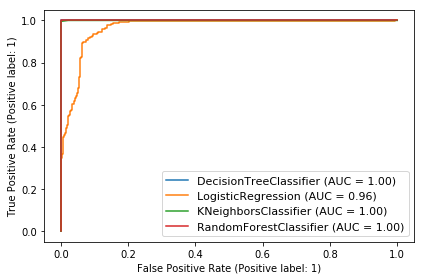

In [119]:
dis=plot_roc_curve(dt,X_test,Y_test)
plot_roc_curve(lr,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(knn,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(rf,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

from the above graph we aree seeing that the auc of Decision tree,Kneighbors & Random Forest Classifier is 1. whereas Logistic Regression score is 0.96

So, we will use Kneighbors for model Deployment as it takes less calcution to use for model deployment

## Model Deployment

In [125]:
knn.fit(X_train,Y_train)

y_pred=knn.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [128]:
accuracy_score(Y_test,y_pred)

0.9971870604781997

In [129]:
confusion_matrix(y_pred,Y_test)

array([[501,   4],
       [  0, 917]], dtype=int64)

In [131]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       501
           1       1.00      1.00      1.00       921

    accuracy                           1.00      1422
   macro avg       1.00      1.00      1.00      1422
weighted avg       1.00      1.00      1.00      1422



I don't think there is need of HyperParameter tuning